# Spearman Correlation Coefficient

In statistics, Spearman’s rank correlation coefficient or Spearman’s ρ, named after Charles Spearman is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables).

It assesses how well the relationship between two variables can be described using a monotonic function.

What is Monotonic Function ?

Let us Understand that first.

The term monotonic relationship is a statistical definition that is used to describe a scenario in which the size of one variable increases as the other variables also increases, or where the size of one variable increases as the other variable also decreases.

 Let's Take a Example & Understand.

In [11]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt



import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)


In [5]:
loan_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/loan_analysis_summary.csv')
loan_df
loan_df.head()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
0,500,3585,3183,19.737013,13660.71827,55000,63396.10292,15.352285,2.463470,0.520266
1,510,8223,7191,19.747810,13889.67226,56000,65446.52263,15.440212,5.565445,1.175378
2,520,9792,8370,20.085761,14186.13920,58728,68261.38708,15.312451,6.477927,1.368087
3,530,10984,9254,20.253199,14487.00838,60000,69041.52340,15.449011,7.162095,1.512578
4,540,12333,10127,20.770446,14756.36706,60000,69948.95243,15.271022,7.837750,1.655271


In [6]:
loan_df.describe()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,675.000000,16994.527778,3589.111111,18.790417,15088.569697,65678.583333,77391.960108,12.520384,2.777778,0.586645
std,105.356538,11917.752515,3512.765608,1.690671,1633.584599,6846.614297,8038.473538,2.560128,2.718690,0.574166
min,500.000000,124.000000,3.000000,14.676210,12994.231600,55000.000000,63396.102920,7.585562,0.002322,0.000490
25%,587.500000,10452.750000,214.250000,17.650570,14038.181180,61297.500000,72364.301710,10.453639,0.165818,0.035019
50%,675.000000,12519.500000,2886.500000,19.083851,14857.024775,63000.000000,74919.065440,13.556549,2.233995,0.471802
75%,762.500000,23774.500000,6123.750000,20.165171,15353.673887,68250.000000,80706.824483,14.732548,4.739451,1.000935
max,850.000000,40444.000000,10164.000000,20.974137,20082.459680,83750.000000,98683.805750,15.449011,7.866386,1.661319


In [7]:
loan_df.cov()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,11100.000000,8.431757e+04,-3.281917e+05,-164.562715,1.179751e+05,6.540867e+05,7.851304e+05,-261.372425,-254.002627,-53.643365
loan_total,84317.571429,1.420328e+08,-6.117364e+06,2841.802408,-9.263903e+06,-1.233279e+07,-9.045332e+06,3454.737681,-4734.508923,-999.891190
default_total,-328191.714286,-6.117364e+06,1.233952e+07,5018.669412,-2.542762e+06,-1.726291e+07,-2.094780e+07,7646.662485,9550.122450,2016.911035
dti,-164.562715,2.841802e+03,5.018669e+03,2.858369,-2.164641e+03,-1.040763e+04,-1.219916e+04,4.167275,3.884179,0.820308
avg_loan_amnt,117975.085123,-9.263903e+06,-2.542762e+06,-2164.640693,2.668599e+06,9.564547e+06,1.092982e+07,-3359.878600,-1967.960087,-415.617751
median_annual_inc,654086.714286,-1.233279e+07,-1.726291e+07,-10407.631551,9.564547e+06,4.687613e+07,5.457827e+07,-16564.670539,-13360.560742,-2821.645746
avg_annual_inc,785130.353840,-9.045332e+06,-2.094780e+07,-12199.161949,1.092982e+07,5.457827e+07,6.461706e+07,-19471.216732,-16212.465719,-3423.945732
int_rate,-261.372425,3.454738e+03,7.646662e+03,4.167275,-3.359879e+03,-1.656467e+04,-1.947122e+04,6.554256,5.918103,1.249857
default_rate,-254.002627,-4.734509e+03,9.550122e+03,3.884179,-1.967960e+03,-1.336056e+04,-1.621247e+04,5.918103,7.391278,1.560980
actual_default_rate,-53.643365,-9.998912e+02,2.016911e+03,0.820308,-4.156178e+02,-2.821646e+03,-3.423946e+03,1.249857,1.560980,0.329667


In [8]:
loan_df.corr()

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.067153,-0.886782,-0.923870,0.685468,0.906772,0.927058,-0.969029,-0.886782,-0.886782
loan_total,0.067153,1.000000,-0.146124,0.141039,-0.475837,-0.151144,-0.094418,0.113229,-0.146124,-0.146124
default_total,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.717776,-0.741849,0.850278,1.000000,1.000000
dti,-0.923870,0.141039,0.845046,1.000000,-0.783764,-0.899118,-0.897630,0.962789,0.845046,0.845046
avg_loan_amnt,0.685468,-0.475837,-0.443113,-0.783764,1.000000,0.855159,0.832335,-0.803379,-0.443113,-0.443113
median_annual_inc,0.906772,-0.151144,-0.717776,-0.899118,0.855159,1.000000,0.991677,-0.945029,-0.717776,-0.717776
avg_annual_inc,0.927058,-0.094418,-0.741849,-0.897630,0.832335,0.991677,1.000000,-0.946145,-0.741849,-0.741849
int_rate,-0.969029,0.113229,0.850278,0.962789,-0.803379,-0.945029,-0.946145,1.000000,0.850278,0.850278
default_rate,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.717776,-0.741849,0.850278,1.000000,1.000000
actual_default_rate,-0.886782,-0.146124,1.000000,0.845046,-0.443113,-0.717776,-0.741849,0.850278,1.000000,1.000000


In [9]:
loan_df.corr(method='spearman')

,fico_score,loan_total,default_total,dti,avg_loan_amnt,median_annual_inc,avg_annual_inc,int_rate,default_rate,actual_default_rate
fico_score,1.000000,0.043243,-0.939511,-0.936422,0.661261,0.956772,0.966281,-0.997169,-0.939511,-0.939511
loan_total,0.043243,1.000000,0.077992,0.029344,-0.344916,0.035934,0.048649,-0.035006,0.077992,0.077992
default_total,-0.939511,0.077992,1.000000,0.967310,-0.601544,-0.889429,-0.899871,0.950322,1.000000,1.000000
dti,-0.936422,0.029344,0.967310,1.000000,-0.576577,-0.877666,-0.890862,0.937709,0.967310,0.967310
avg_loan_amnt,0.661261,-0.344916,-0.601544,-0.576577,1.000000,0.750476,0.711969,-0.656371,-0.601544,-0.601544
median_annual_inc,0.956772,0.035934,-0.889429,-0.877666,0.750476,1.000000,0.979263,-0.955868,-0.889429,-0.889429
avg_annual_inc,0.966281,0.048649,-0.899871,-0.890862,0.711969,0.979263,1.000000,-0.966795,-0.899871,-0.899871
int_rate,-0.997169,-0.035006,0.950322,0.937709,-0.656371,-0.955868,-0.966795,1.000000,0.950322,0.950322
default_rate,-0.939511,0.077992,1.000000,0.967310,-0.601544,-0.889429,-0.899871,0.950322,1.000000,1.000000
actual_default_rate,-0.939511,0.077992,1.000000,0.967310,-0.601544,-0.889429,-0.899871,0.950322,1.000000,1.000000


<AxesSubplot:xlabel='median_annual_inc', ylabel='Density'>

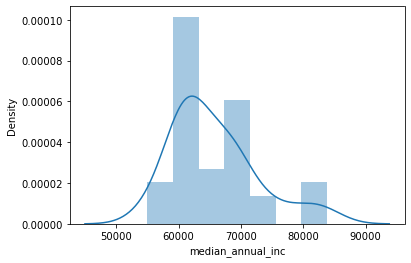

In [12]:
sns.distplot(loan_df['median_annual_inc'], hist=True)

In [13]:
loan_df[['fico_score','median_annual_inc']].corr('spearman')

,fico_score,median_annual_inc
fico_score,1.000000,0.956772
median_annual_inc,0.956772,1.000000


<AxesSubplot:xlabel='fico_score', ylabel='median_annual_inc'>

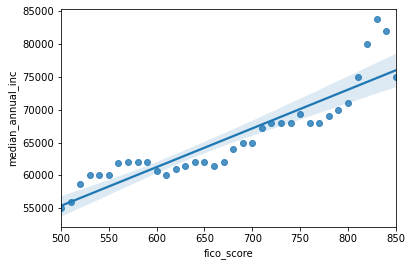

In [14]:
sns.regplot(x='fico_score',y='median_annual_inc',data=loan_df) 

In [15]:
loan_df[['fico_score','avg_annual_inc']].corr('spearman')

,fico_score,avg_annual_inc
fico_score,1.000000,0.966281
avg_annual_inc,0.966281,1.000000


<AxesSubplot:xlabel='fico_score', ylabel='avg_annual_inc'>

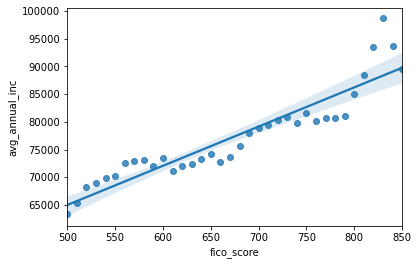

In [16]:
sns.regplot(x='fico_score',y='avg_annual_inc',data=loan_df) 

In [17]:
loan_df[['fico_score','dti']].corr('spearman')

,fico_score,dti
fico_score,1.000000,-0.936422
dti,-0.936422,1.000000


<AxesSubplot:xlabel='fico_score', ylabel='dti'>

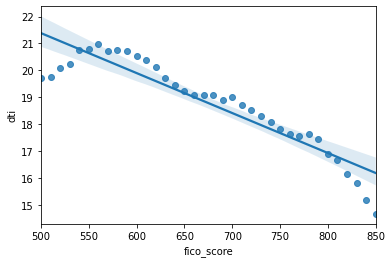

In [18]:
sns.regplot(x='fico_score',y='dti',data=loan_df) 

In [19]:
loan_df[['fico_score','int_rate']].corr()

,fico_score,int_rate
fico_score,1.000000,-0.969029
int_rate,-0.969029,1.000000


<AxesSubplot:xlabel='fico_score', ylabel='int_rate'>

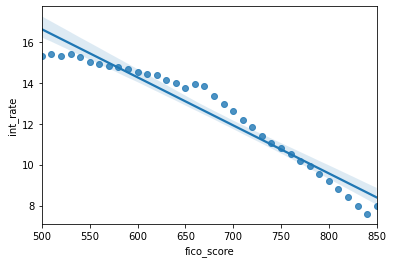

In [20]:
sns.regplot(x='fico_score',y='int_rate',data=loan_df) 

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

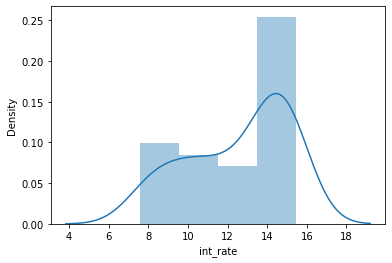

In [21]:
sns.distplot(loan_df['int_rate'], hist=True)

((array([-2.07334886, -1.68217954, -1.44830429, -1.27437681, -1.13225357,
         -1.00993636, -0.90112151, -0.80205412, -0.71029762, -0.62416759,
         -0.54243995, -0.46418751, -0.38868208, -0.31533241, -0.24364313,
         -0.17318609, -0.10357945, -0.03447167,  0.03447167,  0.10357945,
          0.17318609,  0.24364313,  0.31533241,  0.38868208,  0.46418751,
          0.54243995,  0.62416759,  0.71029762,  0.80205412,  0.90112151,
          1.00993636,  1.13225357,  1.27437681,  1.44830429,  1.68217954,
          2.07334886]),
  array([ 7.58556196,  7.96854839,  8.00050755,  8.40436779,  8.81612608,
          9.17925418,  9.54207879,  9.94439109, 10.17342593, 10.54704384,
         10.83639354, 11.07060021, 11.40585966, 11.84989813, 12.19602541,
         12.64158738, 12.99737662, 13.36212073, 13.75097687, 13.84232878,
         13.93910593, 13.99130432, 14.13094166, 14.38872081, 14.45885661,
         14.56445333, 14.71287103, 14.79158065, 14.83095961, 14.93735761,
         15.04

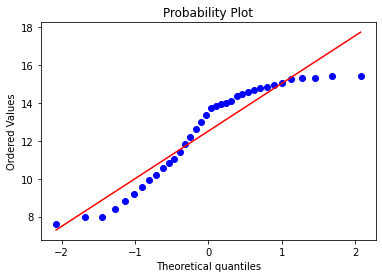

In [22]:
import scipy.stats as stats
stats.probplot(loan_df['int_rate'], dist="norm", plot=plt)

In [23]:
loan_df[['fico_score','loan_total']].corr('spearman')

,fico_score,loan_total
fico_score,1.000000,0.043243
loan_total,0.043243,1.000000


<AxesSubplot:xlabel='fico_score', ylabel='loan_total'>

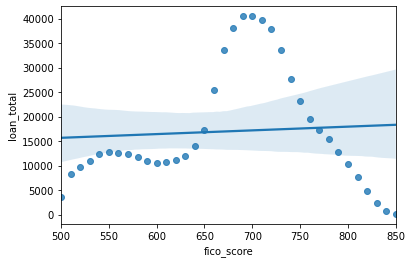

In [24]:
sns.regplot(x='fico_score',y='loan_total',data=loan_df) 

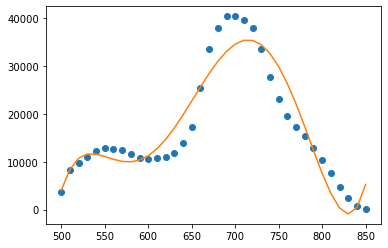

In [25]:
#@title
coeff = np.poly1d(np.polyfit(loan_df['fico_score'], loan_df['loan_total'], 5))

t = loan_df['fico_score']
plt.plot(loan_df['fico_score'], loan_df['loan_total'], 'o', t, coeff(t), '-')
plt.show()

In [26]:
loan_df[['fico_score','default_rate']].corr()

,fico_score,default_rate
fico_score,1.000000,-0.886782
default_rate,-0.886782,1.000000


<AxesSubplot:xlabel='fico_score', ylabel='default_rate'>

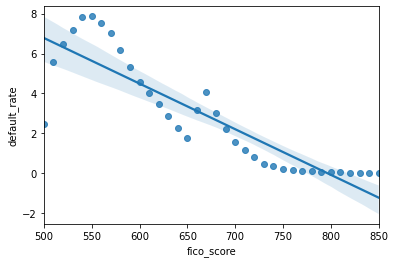

In [27]:
sns.regplot(x='fico_score',y='default_rate',data=loan_df) 

In [28]:
loan_df[['fico_score','default_rate']].corr('spearman')

,fico_score,default_rate
fico_score,1.000000,-0.939511
default_rate,-0.939511,1.000000


In [30]:
loan_df[['median_annual_inc','loan_total']].corr('spearman')

,median_annual_inc,loan_total
median_annual_inc,1.000000,0.035934
loan_total,0.035934,1.000000


<AxesSubplot:xlabel='median_annual_inc', ylabel='loan_total'>

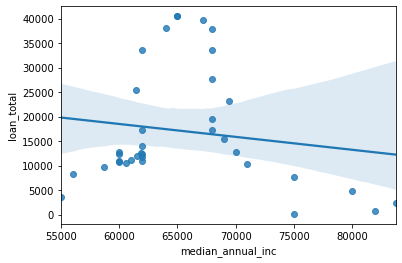

In [31]:
sns.regplot(x='median_annual_inc',y='loan_total',data=loan_df) 

In [32]:
loan_df[['dti','loan_total']].corr('spearman')

,dti,loan_total
dti,1.000000,0.029344
loan_total,0.029344,1.000000


<AxesSubplot:xlabel='dti', ylabel='loan_total'>

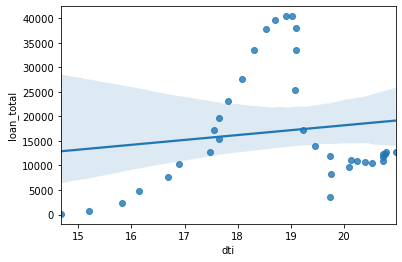

In [33]:
sns.regplot(x='dti',y='loan_total',data=loan_df) 

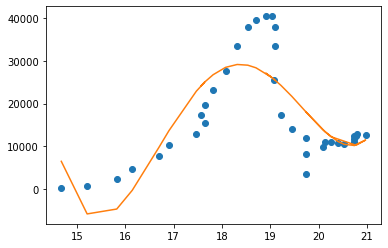

In [34]:
#@title
coeff = np.poly1d(np.polyfit(loan_df['dti'], loan_df['loan_total'], 4))

t = loan_df['dti']
plt.plot(loan_df['dti'], loan_df['loan_total'], 'o', t, coeff(t), '-')
plt.show()

Now, Let's Understand when to use Spearman Correlation Coeff


Spearman correlation is often used to evaluate relationships involving ordinal variables.